In [2]:
import matplotlib

import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url,  cache_dir = '.', untar = True)

228813984/228813984 [==============================] - 12s 0us/step


In [4]:
data_dir

'.\\datasets\\flower_photos'

In [6]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [7]:
image_count = len(list(data_dir.glob("*/*.jpg")))

3670

In [8]:
roses = list(data_dir.glob("roses/*"))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

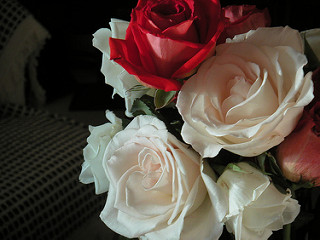

In [9]:
PIL.Image.open(str(roses[1]))

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [12]:
flowers_images_dict['roses'][0]

WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg')

In [15]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 179, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [23]:
num_classes = 5

model = Sequential([
    layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation = "relu"),
    keras.layers.Dropout(0.5),
    layers.Dense(num_classes, activation = "relu")   
])

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs = 15)   

Epoch 1/15
86/86 [==============================] - 10s 101ms/step - loss: 1.5776 - accuracy: 0.2540
Epoch 2/15
86/86 [==============================] - 9s 101ms/step - loss: 1.3228 - accuracy: 0.4622
Epoch 3/15
86/86 [==============================] - 9s 101ms/step - loss: 1.0886 - accuracy: 0.5872
Epoch 4/15
86/86 [==============================] - 9s 102ms/step - loss: 1.0019 - accuracy: 0.6344
Epoch 5/15
86/86 [==============================] - 9s 100ms/step - loss: 0.8957 - accuracy: 0.6751
Epoch 6/15
86/86 [==============================] - 9s 100ms/step - loss: 0.7943 - accuracy: 0.7155
Epoch 7/15
86/86 [==============================] - 9s 103ms/step - loss: 0.6743 - accuracy: 0.7594
Epoch 8/15
86/86 [==============================] - 9s 101ms/step - loss: 0.5691 - accuracy: 0.7972
Epoch 9/15
86/86 [==============================] - 9s 101ms/step - loss: 0.4457 - accuracy: 0.8430
Epoch 10/15
86/86 [==============================] - 9s 100ms/step - loss: 0.3358 - accuracy: 0.884

In [24]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 25ms/step - loss: 1.2613 - accuracy: 0.7026


[1.2612954378128052, 0.7026143670082092]

In [36]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

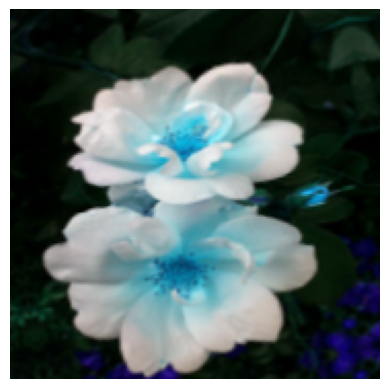

In [38]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [39]:
num_classes = 5

model = Sequential([
    data_augmentation,
    layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = "same", activation = "relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    keras.layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = "relu"),
    layers.Dense(num_classes)   
])

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs = 15) 

Epoch 1/15
86/86 [==============================] - 11s 124ms/step - loss: 1.2737 - accuracy: 0.4709
Epoch 2/15
86/86 [==============================] - 10s 122ms/step - loss: 1.0107 - accuracy: 0.5988
Epoch 3/15
86/86 [==============================] - 10s 120ms/step - loss: 0.8978 - accuracy: 0.6504
Epoch 4/15
86/86 [==============================] - 11s 130ms/step - loss: 0.8162 - accuracy: 0.6820
Epoch 5/15
86/86 [==============================] - 11s 126ms/step - loss: 0.7730 - accuracy: 0.7097
Epoch 6/15
86/86 [==============================] - 11s 130ms/step - loss: 0.7239 - accuracy: 0.7231
Epoch 7/15
86/86 [==============================] - 11s 129ms/step - loss: 0.7014 - accuracy: 0.7351
Epoch 8/15
86/86 [==============================] - 11s 128ms/step - loss: 0.6684 - accuracy: 0.7391
Epoch 9/15
86/86 [==============================] - 11s 125ms/step - loss: 0.6314 - accuracy: 0.7602
Epoch 10/15
86/86 [==============================] - 11s 130ms/step - loss: 0.6125 - accura

: 